<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Tensorflow-Developer-ZTM/blob/main/%5BPractice%5D_09_SkimLit_nlp_milestone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 2: SkimLit 📄🔥
  

In this project, we're going to be replicating the deep learning model behind the 2017 paper [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071).

When it was released, the paper presented a new dataset called PubMed 200k RCT which consists of ~200,000 labelled Randomized Controlled Trial (RCT) abstracts.

The goal of the dataset was to explore the ability for NLP models to classify sentences which appear in sequential order.

In other words, given the abstract of a RCT, what role does each sentence serve in the abstract?  

### Model Input

For example, can we train an NLP model which takes the following input (note: the following sample has had all numerical symbols replaced with "@"):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model output

And returns the following output:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

### Problem in a sentence

The number of RCT papers released is continuing to increase, those without structured abstracts can be hard to read and in turn slow down researchers moving through the literature. 

### Solution in a sentence

Create an NLP model to classify abstract sentences into the role they play (e.g. objective, methods, results, etc)  to enable researchers to skim through the literature (hence SkimLit 🤓🔥) and dive deeper when necessary.
### Some info about dataset from authors github:  
- PubMed 20k is a subset of PubMed 200k. I.e., any abstract present in PubMed 20k is also present in PubMed 200k. 
- `PubMed_200k_RCT` is the same as `PubMed_200k_RCT_numbers_replaced_with_at_sign`, except that in the latter all numbers had been replaced by `@`. (same for `PubMed_20k_RCT` vs. `PubMed_20k_RCT_numbers_replaced_with_at_sign`).
- Since Github file size limit is [100 MiB](https://stackoverflow.com/a/43098961/395857), we had to compress `PubMed_200k_RCT\train.7z` and `PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip`. To uncompress `train.7z`, you may use [7-Zip](http://www.7-zip.org/download.html) on Windows,  [Keka](http://www.kekaosx.com/en/) on Mac OS X, or [p7zip](http://p7zip.sourceforge.net/) on Linux.  

## Steps we will follow:  
  
* Downloading a text dataset ([PubMed RCT200k from GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct))
* Writing a preprocessing function to prepare our data for modelling
* Setting up a series of modelling experiments
  * Making a baseline (TF-IDF classifier)
  * Deep models with different combinations of: token embeddings, character embeddings, pretrained embeddings, positional embeddings
* Building a multimodal model (taking multiple types of data inputs)
  * Replicating the model architecture from https://arxiv.org/pdf/1612.05251.pdf 
* Find the most wrong predictions
* Making predictions on PubMed abstracts from the wild




In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
# Check what files are in the PubMed_20k dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/
!ls pubmed-rct/PubMed_20k_RCT/

dev.txt  test.txt  train.txt
dev.txt  test.txt  train.txt


In [4]:
# Open the files and see how they are written

In [5]:
# Start our experiments using the 20k dataset with numbers replaced by @ sign
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [6]:
# Check filenames in target directory
import os
filenames = [data_dir + "/" + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## Preprocess data

Okay, now we've downloaded some text data, but we're not ready to model it yet
  
> Visualize, visualize, visualize?

To get familiar and understand how we have to prepare our data for our deep learning models, we've got to visualize it.

Because our data is in the form of text files, let's make a function to read each of the lines in a target file.

In [7]:
# Create function to read the lines of the document
def get_lines(filename):
  """
  reads filename (text file) and returns lines of text as a list.  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """

  with open(filename, 'r') as f:
    return f.readlines()

In [8]:
# Read in the lines in train.txt
train_lines = get_lines(data_dir+"/train.txt")
train_lines[:28]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [9]:
len(train_lines)

210040


Now we need to separate these into labels and training text.
Reading the lines from the training text file results in a list of strings containing different abstract samples, the sentences in a sample along with the role the sentence plays in the abstract.

The role of each sentence is prefixed at the start of each line separated by a tab (`\t`) and each sentence finishes with a new line (`\n`).

Different abstracts are separated by abstract ID's (lines beginning with `###`) and newlines (`\n`).

Knowing this, it looks like we've got a couple of steps to do to get our samples ready to pass as training data to our future machine learning model.

Let's write a function to perform the following steps:
* Take a target file of abstract samples.
* Read the lines in the target file.
* For each line in the target file:  
  * If the line begins with `###` mark it as an abstract ID and the beginning of a new abstract.
    * Keep count of the number of lines in a sample.
  * If the line begins with `\n` mark it as the end of an abstract sample.
    * Keep count of the total lines in a sample.
  * Record the text before the `\t` as the label of the line.
  * Record the text after the `\t` as the text of the line.
* Return all of the lines in the target text file as a list of dictionaries containing the key/value pairs:
  * `"line_number"` - the position of the line in the abstract (e.g. `3`).
  * `"target"` - the role of the line in the abstract (e.g. `OBJECTIVE`).
  * `"text"` - the text of the line in the abstract.
  * `"total_lines"` - the total lines in an abstract sample (e.g. `14`).
* Abstract ID's and newlines should be omitted from the returned preprocessed data.

Example returned preprocessed sample (a single line from an abstract):

```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```

In [10]:
# My function
def create_dictionaries_of_lines(text_lines):
  line_num = 0
  abstract_number = 0
  list_of_dicts = []
  total_lines = 0
  for idx, line in enumerate(text_lines):
    line_dict = {}
    if line.startswith("###"):
      curr_idx = idx + 1
      line_for_total = text_lines[curr_idx]
      while(line_for_total != "\n"):
        total_lines += 1
        curr_idx += 1
        line_for_total = text_lines[curr_idx]
      total_lines -= 1 # Because we are using 0 indexing
      continue
    elif line.startswith("\n"):
      line_num = 0
      total_lines = 0
      continue

    target, text = line.split('\t')
    line_dict['line_number'] =  line_num
    line_dict['target'] = target
    line_dict['text'] = text
    line_dict['total_lines'] = total_lines
    line_num += 1
    list_of_dicts.append(line_dict)
  return list_of_dicts

In [11]:
# Function from ZTM tensorflow developer course
def preprocess_text_with_line_numbers(filename):
  """
  Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename [python list]
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in the target lines
  for line in input_lines:
    if line.startswith("###"): # check to see if the line is an id line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line (in python "\n" means space)
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # Create an empty dictionary for each line
        target_text_split = abstract_line.split('\t') # Split target label from text
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number # line number in the abstract
        line_data['total_lines'] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list
    
    else: # if the above conditioned aren't fulfilled the line contains an abstract sentence
      abstract_lines += line

  return abstract_samples
    


In [12]:
line = 'BACKGROUND\tEmotional eating is associated with overeating and the development of obesity .\n'
a, b = line.split('\t')

In [13]:
a

'BACKGROUND'

In [14]:
b

'Emotional eating is associated with overeating and the development of obesity .\n'

In [15]:
temp_lines = ['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n',
 '###24854809\n',
 'BACKGROUND\tEmotional eating is associated with overeating and the development of obesity .\n',
 'BACKGROUND\tYet , empirical evidence for individual ( trait ) differences in emotional eating and cognitive mechanisms that contribute to eating during sad mood remain equivocal .\n',
 'OBJECTIVE\tThe aim of this study was to test if attention bias for food moderates the effect of self-reported emotional eating during sad mood ( vs neutral mood ) on actual food intake .\n',
 'OBJECTIVE\tIt was expected that emotional eating is predictive of elevated attention for food and higher food intake after an experimentally induced sad mood and that attentional maintenance on food predicts food intake during a sad versus a neutral mood .\n',
 'METHODS\tParticipants ( N = @ ) were randomly assigned to one of the two experimental mood induction conditions ( sad/neutral ) .\n',
 'METHODS\tAttentional biases for high caloric foods were measured by eye tracking during a visual probe task with pictorial food and neutral stimuli .\n',
 'METHODS\tSelf-reported emotional eating was assessed with the Dutch Eating Behavior Questionnaire ( DEBQ ) and ad libitum food intake was tested by a disguised food offer .\n',
 'RESULTS\tHierarchical multivariate regression modeling showed that self-reported emotional eating did not account for changes in attention allocation for food or food intake in either condition .\n',
 'RESULTS\tYet , attention maintenance on food cues was significantly related to increased intake specifically in the neutral condition , but not in the sad mood condition .\n',
 'CONCLUSIONS\tThe current findings show that self-reported emotional eating ( based on the DEBQ ) might not validly predict who overeats when sad , at least not in a laboratory setting with healthy women .\n',
 'CONCLUSIONS\tResults further suggest that attention maintenance on food relates to eating motivation when in a neutral affective state , and might therefore be a cognitive mechanism contributing to increased food intake in general , but maybe not during sad mood .\n',
 '\n']

In [16]:
# Using mmy function
%%time
temp_dict = create_dictionaries_of_lines(train_lines)

CPU times: user 306 ms, sys: 44.2 ms, total: 350 ms
Wall time: 359 ms


In [17]:
temp_dict

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'Secondary outcome measures

In [18]:
# Using course function
%%time
temp_dict = preprocess_text_with_line_numbers(data_dir+"/train.txt")

CPU times: user 438 ms, sys: 120 ms, total: 558 ms
Wall time: 645 ms


In [19]:
len(temp_dict)

180040

Finally preprocess our required train, dev and test data

In [20]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "/train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "/dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "/test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 594 ms, sys: 106 ms, total: 701 ms
Wall time: 775 ms


How do our training samples look?

In [21]:
# Check the first abstract of our training data
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

`preprocess_text_with_line_numbers()` function worked great. 

Now let's turn our list of dictionaries into pandas DataFrame's so we can visualize them better.

In [22]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

target  ... total_lines
0     OBJECTIVE  ...          11
1       METHODS  ...          11
2       METHODS  ...          11
3       METHODS  ...          11
4       METHODS  ...          11
5       METHODS  ...          11
6       RESULTS  ...          11
7       RESULTS  ...          11
8       RESULTS  ...          11
9       RESULTS  ...          11
10      RESULTS  ...          11
11  CONCLUSIONS  ...          11
12   BACKGROUND  ...          10
13   BACKGROUND  ...          10

[14 rows x 4 columns]

Now our data is in DataFrame form, we can perform some data analysis on it. 

In [23]:
# Distribution of labels in training data
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

Looks like sentences with the `OBJECTIVE` label are the least common.


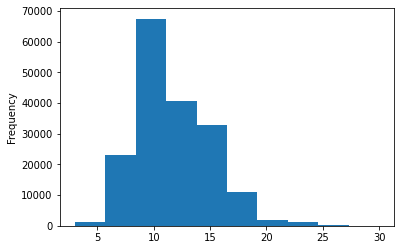

In [24]:
train_df.total_lines.plot.hist();

Okay, looks like most of the abstracts are around 7 to 15 sentences in length.

It's good to check these things out to make sure when we do train a model or test it on unseen samples, our results aren't outlandish.

### Get lists of sentences

When we build our deep learning model, one of its main inputs will be a list of strings (the lines of an abstract).

We can get these easily from our DataFrames by calling the `tolist()` method on our `"text"` columns.

In [25]:
# Convert abstract text lines into lists 
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [26]:
# View first 10 lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Make labels numeric 

In [27]:
# # One hot encode labels
# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse = True)
# train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy())

ValueError: ignored

In [28]:
# # One hot encode labels
# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse = True)
# train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
# train_labels_one_hot

<180040x5 sparse matrix of type '<class 'numpy.float64'>'
	with 180040 stored elements in Compressed Sparse Row format>

In [29]:
# import tensorflow as tf
# tf.constant(train_labels_one_hot)

ValueError: ignored

In [30]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [31]:
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [32]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [33]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1, 1))
train_labels_one_hot, val_labels_one_hot, test_labels_one_hot

(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]), array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]), array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.]]))

### Label encode labels 

In [34]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded, val_labels_encoded, test_labels_encoded

(array([3, 2, 2, ..., 4, 1, 1]),
 array([0, 0, 3, ..., 4, 1, 1]),
 array([0, 4, 4, ..., 4, 4, 1]))

In [35]:
# Get class names and num of classes from encoded labels
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Creating a series of model experiments

We've proprocessed our data so now, it's time to setup a series of modelling experiments.

We'll start by creating a simple baseline model to obtain a score we'll try to beat by building more and more complex models as we move towards replicating the sequence model outlined in [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

For each model, we'll train it on the training data and evaluate it on the validation data.

## Model 0: Getting a baseline 

Our first model we'll be a TF-IDF Multinomial Naive Bayes as recommended by [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

To build it, we'll create a Scikit-Learn `Pipeline` which uses the [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class to convert our abstract sentences to numbers using the TF-IDF (term frequency-inverse document frequecy) algorithm and then learns to classify our sentences using the [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) aglorithm.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
                    ("tf-idf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X = train_sentences,
            y = train_labels_encoded)

Pipeline(memory=None,
         steps=[('tf-idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [37]:
# Evaluate baseline model on validation dataset
model_0.score(X = val_sentences,
              y = val_labels_encoded)

0.7218323844829869

In [38]:
# Make predictions using our baselne model
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [39]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

### Dowload helper function script


In [40]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-23 19:28:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-23 19:28:23 (63.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



Now we've got the helper functions script we can import the `caculate_results()` function and see how our baseline model went.

In [41]:
# Import calculate_results helper function
from helper_functions import calculate_results

In [42]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

## Preparing our data for deep sequence models

But before we start building deeper models, we've got to create vectorization and embedding layers.

The vectorization layer will convert our text to numbers and the embedding layer will capture the relationships between those numbers.


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [44]:
# Average sentence length
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

In [45]:
import matplotlib.pyplot as plt

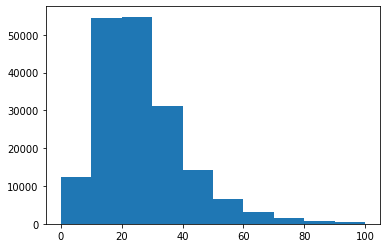

In [46]:
# Check distribution of sentence length
plt.hist(sent_lens, range = (0,100));

In [47]:
# How long of a sentence covers 95% of the example lengths? 
# (x percentile of sentences below y sentence length)
percentile_95_len = int(np.percentile(sent_lens, 95))
percentile_95_len


55

In [48]:
# Maximum sentence length in the training set
max(sent_lens)

296

When we create our tokenization layer, we'll use this value to turn all of our sentences into the same length. 
This is so that we don't lose much info.

### Create text vectorizer

We'll use the [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) layer from TensorFlow.

We'll keep all the parameters default except for `max_tokens` (the number of unique words in our dataset) and `output_sequence_length` (our desired output length for each vectorized sentence).

Section 3.2 of the [PubMed 200k RCT paper](https://arxiv.org/pdf/1710.06071.pdf) states the vocabulary size of the PubMed 20k dataset as `68,000`. So we'll use that as our `max_tokens` parameter.

In [49]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
MAX_TOKENS = 68000
MAX_SEQ_LEN = 55

In [50]:
# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = MAX_TOKENS,
                                    output_sequence_length = MAX_SEQ_LEN)

In [51]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [52]:
# Test our adapted text_vectorizer on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
in the trial group , u ( rbc ) level decreased after treatment but changed more significantly .

Length of text: 18

Vectorized text:
[[   5    2   32   13 1789 3968  204  212   21   19   72 2039   69   39
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


Using the [`get_vocabulary()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) method of our `text_vectorizer` we can find out a few different tidbits about our text.

In [53]:
# Num words in training vocab
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [54]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True}

### Create custom text embedding

In [55]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                               output_dim = 128,
                               mask_zero = True,
                               name = "token_embedding")

In [56]:
# Show an example embedding
print(f"Sentence before vectorization: \n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization:\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization: 
in the trial group , u ( rbc ) level decreased after treatment but changed more significantly .

Sentence after vectorization:
[[   5    2   32   13 1789 3968  204  212   21   19   72 2039   69   39
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Sentence after embedding:
[[[-0.01115943 -0.0092902  -0.04742987 ...  0.04333324  0.0148634
    0.02639933]
  [ 0.03226336  0.00332702  0.04938119 ... -0.02908957  0.0197139
   -0.0496769 ]
  [ 0.01924757  0.02397254 -0.00830273 ... -0.01982657 -0.02735921
   -0.01117862]
  ...
  [-0.0331478  -0.01932211  0.02057685 ... -0.03890768  0.0297536
    0.02688775]
  [-0.0331478  -0.01932211  0.02057685 ... -0.03890768  0.0297536
    0.02688775]
  [-0.0331478  -0.01932211  0.02057685 ... -0.03890768  0.0297536
    0.02688775]]]

Embedded sentence shape: (1

## Creating highly performant datasets (making sure our data loads as fast as possible)

In [57]:
# Turn out data into Tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [58]:
train_labels_one_hot[0], train_labels_one_hot.shape

(array([0., 0., 0., 1., 0.]), (180040, 5))

In [59]:
# Convert the TensorSliceDataset to PrefetchDataset
# We are not shuffling the train data here as order is important for our usecase. 
# We might want the model to learn the order in which various sections appear in an abstract.
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

## Model 1: Conv1D with token embeddings

In [60]:
# Create a 1D conv model to process sequences
inputs = layers.Input(shape = (1,), dtype = tf.string) # input is (1,) as we process one sentence at a time
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size= 5, padding = 'same', activation = 'relu')(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_1.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
token_embedding (Embedding)  (None, 55, 128)           8299648   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            41024     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 8,340,997
Trainable params: 8,340,997
Non-trainable params: 0
___________________________________________________

In [61]:
len(train_dataset)

5627

In [62]:
# There are a lot of sentences. We need to reduce the samples that we will train.
5627 * 32

180064

In [63]:
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.1 * (len(train_dataset))), # only look at 10% of the data during each epoch
                              batch_size = 32,
                              epochs = 3,
                              validation_data = valid_dataset,
                              validation_steps = int(0.1 * len(valid_dataset)) # only validate on 10% of valid_data each epoch
                              )

Epoch 1/3
562/562 [==============================] - 39s 14ms/step - loss: 0.9280 - accuracy: 0.6314 - val_loss: 0.6891 - val_accuracy: 0.7344
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6562 - accuracy: 0.7587 - val_loss: 0.6338 - val_accuracy: 0.7666
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6149 - accuracy: 0.7740 - val_loss: 0.5957 - val_accuracy: 0.7832


In [64]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.5959 - accuracy: 0.7863


[0.5958911776542664, 0.7863431572914124]

In [65]:
# Make predictions on our validation data
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs[:10], model_1_pred_probs.shape

(array([[4.4322911e-01, 1.3616470e-01, 4.4434227e-02, 3.5767248e-01,
         1.8499503e-02],
        [4.2450634e-01, 2.9990837e-01, 1.2607607e-02, 2.5285751e-01,
         1.0120069e-02],
        [1.5131100e-01, 5.9670405e-03, 1.2746294e-03, 8.4142309e-01,
         2.4305633e-05],
        [1.5473854e-05, 5.6735385e-04, 9.7479135e-01, 1.1878083e-05,
         2.4613876e-02],
        [1.0441231e-03, 5.2223559e-02, 3.0466497e-01, 6.3834968e-04,
         6.4142907e-01],
        [2.3236493e-02, 3.0557977e-02, 5.6641459e-01, 1.0974975e-02,
         3.6881590e-01],
        [7.1480562e-04, 5.4498459e-03, 2.9317462e-01, 3.3921655e-04,
         7.0032150e-01],
        [2.9474366e-02, 2.7119804e-02, 6.5554619e-01, 1.4903998e-02,
         2.7295566e-01],
        [1.2989051e-12, 3.2615944e-08, 1.5772649e-07, 8.3145616e-13,
         9.9999976e-01],
        [1.1059797e-02, 6.9025952e-01, 5.0410096e-02, 2.0226618e-02,
         2.2804393e-01]], dtype=float32), (30212, 5))

In [66]:
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [67]:
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [68]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [69]:
# Calculate model 1 results
model_1_results = calculate_results(val_labels_encoded, model_1_preds)
model_1_results

{'accuracy': 78.63431748973917,
 'f1': 0.7839916358166771,
 'precision': 0.7833278703503157,
 'recall': 0.7863431748973918}

In [70]:
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

## Model 2: Feature extraction using pretrained token embeddings
  
> Always try to use the latest version for feature extraction (pretrained embeddings or weights) trained on a model that is very similar to your problem.  
  
Now let's use pretrained word embeddings from tfhub (USE: Universal Sentece Embeddings).  
USE: https://tfhub.dev/google/universal-sentence-encoder/4  


In [71]:
import tensorflow_hub as hub

tf_hub_embedding = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  trainable = False,
                                  name = 'universal_sentence_encoder'
                            )



In [72]:
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
tf_hub_embedded_sentence = tf_hub_embedding([random_train_sentence])
print("Sentence after embedding:\n",tf_hub_embedded_sentence)
print("Shape of the embedded sentence:", tf_hub_embedded_sentence.shape)

Random sentence:
 each group consists of an intervention arm and an usual care arm .
Sentence after embedding:
 tf.Tensor(
[[-0.03830302 -0.04087577 -0.03849283  0.06054251 -0.03874775 -0.06330259
   0.02810409  0.02334386 -0.04531051 -0.01809481  0.08104867  0.00805095
  -0.03876734  0.02438254  0.00209245 -0.01977453 -0.05958495  0.03067199
  -0.08010601  0.04297046 -0.01593156  0.08089345  0.0200492  -0.02433875
  -0.00414217  0.01805349  0.00149381 -0.04552845  0.04421617  0.01830461
   0.05511979  0.08010336 -0.02488327 -0.05287372 -0.03104346  0.04807023
   0.07227537  0.03201409 -0.02850981 -0.0646143  -0.02012949  0.04388025
   0.06644025  0.05535064 -0.01357921 -0.06137865  0.00941377 -0.04040173
  -0.04095444  0.04703439 -0.03934502 -0.03926135  0.04461368 -0.04031423
  -0.0134974  -0.01252666 -0.00222433  0.00913573  0.07789095 -0.02763122
   0.03709501  0.02120729 -0.00826947  0.05916576  0.03420113 -0.00164174
   0.0730611  -0.04157781  0.01671351 -0.06956222  0.01582895 -

In [73]:
# Model 2: feature extraction model using TF Hub USE sentence encoding layer

inputs = layers.Input(shape = [], dtype = tf.string) # input to the USE must be an empty list as it takes input sentences as a list.
pretrained_embedding = tf_hub_embedding(inputs)
x = layers.Dense(128, activation='relu')(pretrained_embedding)
outputs = layers.Dense(num_classes, activation = 'softmax')(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_2.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
universal_sentence_encoder ( (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [74]:
history_model_2 = model_2.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              epochs = 3,
                              validation_data = valid_dataset,
                              validation_steps = int(0.1* len(valid_dataset))
                              )

Epoch 1/3
562/562 [==============================] - 21s 32ms/step - loss: 0.9183 - accuracy: 0.6507 - val_loss: 0.7940 - val_accuracy: 0.6892
Epoch 2/3
562/562 [==============================] - 16s 29ms/step - loss: 0.7655 - accuracy: 0.7030 - val_loss: 0.7505 - val_accuracy: 0.7048
Epoch 3/3
562/562 [==============================] - 18s 32ms/step - loss: 0.7458 - accuracy: 0.7126 - val_loss: 0.7333 - val_accuracy: 0.7197


In [75]:
# Evaluate on the whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 27s 29ms/step - loss: 0.7364 - accuracy: 0.7167


[0.7364357709884644, 0.7166688442230225]

In [76]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[4.2924157e-01, 3.4683731e-01, 1.8539734e-03, 2.1321620e-01,
        8.8509489e-03],
       [3.7459967e-01, 4.7848520e-01, 3.3068557e-03, 1.4062430e-01,
        2.9839841e-03],
       [2.4889454e-01, 1.4516181e-01, 1.6864017e-02, 5.5207866e-01,
        3.7000939e-02],
       ...,
       [1.8475997e-03, 5.2684513e-03, 4.3476436e-02, 7.5645169e-04,
        9.4865102e-01],
       [3.4730097e-03, 4.1339308e-02, 2.0688872e-01, 1.3641971e-03,
        7.4693477e-01],
       [1.6428326e-01, 2.8565767e-01, 4.9318904e-01, 7.0659374e-03,
        4.9804114e-02]], dtype=float32)

In [77]:
# Convert prediction probabilities to numeric labels
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [78]:
model_2_results = calculate_results(val_labels_encoded, model_2_preds)
model_2_results

{'accuracy': 71.66688732953793,
 'f1': 0.7136711934692845,
 'precision': 0.7170924755965423,
 'recall': 0.7166688732953793}

In [79]:
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

In [80]:
model_1_results

{'accuracy': 78.63431748973917,
 'f1': 0.7839916358166771,
 'precision': 0.7833278703503157,
 'recall': 0.7863431748973918}

## Model 3: Conv1D with character embeddings

(The paper we are replicating used a combination of token and character-level embeddings.)

### Create a character level tokenizer

In [81]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [83]:
list(train_sentences[0])

['t',
 'o',
 ' ',
 'i',
 'n',
 'v',
 'e',
 's',
 't',
 'i',
 'g',
 'a',
 't',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'e',
 'f',
 'f',
 'i',
 'c',
 'a',
 'c',
 'y',
 ' ',
 'o',
 'f',
 ' ',
 '@',
 ' ',
 'w',
 'e',
 'e',
 'k',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'd',
 'a',
 'i',
 'l',
 'y',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'd',
 'o',
 's',
 'e',
 ' ',
 'o',
 'r',
 'a',
 'l',
 ' ',
 'p',
 'r',
 'e',
 'd',
 'n',
 'i',
 's',
 'o',
 'l',
 'o',
 'n',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'i',
 'm',
 'p',
 'r',
 'o',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'a',
 'i',
 'n',
 ' ',
 ',',
 ' ',
 'm',
 'o',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 ' ',
 ',',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 's',
 'y',
 's',
 't',
 'e',
 'm',
 'i',
 'c',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'g',
 'r',
 'a',
 'd',
 'e',
 ' ',
 'i',
 'n',
 'f',
 'l',
 'a',
 'm',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'h',
 'o',
 'r',
 't',
 ' ',
 't',
 'e',
 'r',
 'm',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'w',
 'h',
 'e'

In [84]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [85]:
!nvidia-smi

Thu Sep 23 19:32:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    60W / 149W |   1551MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [87]:
# Make a function to split sentences to characters
def split_chars(text):
  return " ".join(list(text))

# Text splitting non-character-level sequence into characters
split_chars(random_train_sentence)

'e a c h   g r o u p   c o n s i s t s   o f   a n   i n t e r v e n t i o n   a r m   a n d   a n   u s u a l   c a r e   a r m   .'

In [91]:
# Split sequence level data splits into character level data splits
train_chars = [split_chars(sen) for sen in train_sentences]
val_chars = [split_chars(sen) for sen in val_sentences]
test_chars = [split_chars(sen) for sen in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [103]:
# Find the average character length
char_lens = [len(sen) for sen in train_sentences]
mean_char_lens = np.mean(char_lens)

# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))

mean_char_lens, output_seq_char_len

(149.3662574983337, 290)

In [100]:
len(train_sentences[0].split()), len(train_sentences[0])

(49, 281)

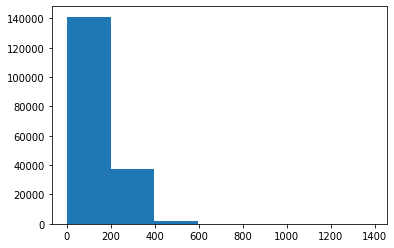

In [102]:
# Check the distribution of char lens
import matplotlib.pyplot as plt
plt.hist(char_lens, bins = 7);

In [ ]:
# Find how many characters we need to tokenize for
# Get all keyboard characters


In [124]:
a = ['a', 'b', 'c']
b = ['c', 'd', 'e']
c = set(a + b)
c

{'a', 'b', 'c', 'd', 'e'}

In [133]:
len(list(random_train_sentence))

66

In [134]:
len(list(random_train_sentence) + list(random_train_sentence))

132

In [146]:
l = []
# l = [(l + list(sen)) for sen in train_sentences]
for idx, sen in enumerate(train_sentences):
  l = l + list(sen)
  print(len(l))
  print(idx)

Streaming output truncated to the last 5000 lines.
4121532
27629
4121776
27630
4121882
27631
4121978
27632
4122094
27633
4122231
27634
4122412
27635
4122566
27636
4122692
27637
4122793
27638
4122978
27639
4123068
27640
4123165
27641
4123257
27642
4123341
27643
4123459
27644
4123760
27645
4123853
27646
4123922
27647
4124057
27648
4124150
27649
4124397
27650
4124500
27651
4124720
27652
4124904
27653
4125093
27654
4125244
27655
4125394
27656
4125668
27657
4125789
27658
4125884
27659
4125960
27660
4126056
27661
4126185
27662
4126300
27663
4126481
27664
4126634
27665
4126801
27666
4126885
27667
4126891
27668
4126998
27669
4127100
27670
4127314
27671
4127393
27672
4127483
27673
4127558
27674
4127672
27675
4127930
27676
4128315
27677
4128492
27678
4128733
27679
4128906
27680
4129038
27681
4129190
27682
4129354
27683
4129398
27684
4129452
27685
4129620
27686
4129731
27687
4129852
27688
4129945
27689
4130110
27690
4130305
27691
4130454
27692
4130675
27693
4130795
27694
4130984
27695
4131145
276

KeyboardInterrupt: ignored

In [ ]:
len(l)

In [129]:
unique_l = set(l)
unique_l, len(unique_l)

[['t',
  'o',
  ' ',
  'i',
  'n',
  'v',
  'e',
  's',
  't',
  'i',
  'g',
  'a',
  't',
  'e',
  ' ',
  't',
  'h',
  'e',
  ' ',
  'e',
  'f',
  'f',
  'i',
  'c',
  'a',
  'c',
  'y',
  ' ',
  'o',
  'f',
  ' ',
  '@',
  ' ',
  'w',
  'e',
  'e',
  'k',
  's',
  ' ',
  'o',
  'f',
  ' ',
  'd',
  'a',
  'i',
  'l',
  'y',
  ' ',
  'l',
  'o',
  'w',
  '-',
  'd',
  'o',
  's',
  'e',
  ' ',
  'o',
  'r',
  'a',
  'l',
  ' ',
  'p',
  'r',
  'e',
  'd',
  'n',
  'i',
  's',
  'o',
  'l',
  'o',
  'n',
  'e',
  ' ',
  'i',
  'n',
  ' ',
  'i',
  'm',
  'p',
  'r',
  'o',
  'v',
  'i',
  'n',
  'g',
  ' ',
  'p',
  'a',
  'i',
  'n',
  ' ',
  ',',
  ' ',
  'm',
  'o',
  'b',
  'i',
  'l',
  'i',
  't',
  'y',
  ' ',
  ',',
  ' ',
  'a',
  'n',
  'd',
  ' ',
  's',
  'y',
  's',
  't',
  'e',
  'm',
  'i',
  'c',
  ' ',
  'l',
  'o',
  'w',
  '-',
  'g',
  'r',
  'a',
  'd',
  'e',
  ' ',
  'i',
  'n',
  'f',
  'l',
  'a',
  'm',
  'm',
  'a',
  't',
  'i',
  'o',
  'n',
  ' ',
  'i',

In [ ]:
unique_l_2 = np.unique(l)
unique_l_2, len(unique_l_2)

In [ ]:
random.choice(train_sentences)

In [147]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [160]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and [UNK] token
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    standardize = 'lower_and_strip_punctuation', # set standardization to none if you want to leave punctuations in
                                    name = 'char_vectorizer'
                                    )

In [161]:
# Adapt char vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [162]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characteres: {char_vocab[:5]}")
print(f"5 least common characteres: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characteres: ['', '[UNK]', 'e', 't', 'i']
5 least common characteres: ['k', 'x', 'z', 'q', 'j']


In [157]:
# # <<TRYING WITH NO STANDARDIZATION>>
# # Create char-level token vectorizer instance
# NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and [UNK] token
# char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
#                                     output_sequence_length = output_seq_char_len,
#                                     standardize = None,
#                                     name = 'char_vectorizer'
#                                     )

In [158]:
# # Adapt char vectorizer to training characters
# char_vectorizer.adapt(train_chars)

In [159]:
# char_vocab = char_vectorizer.get_vocabulary()
# print(f"Number of different characters in character vocab: {len(char_vocab)}")
# print(f"5 most common characteres: {char_vocab[:5]}")
# print(f"5 least common characteres: {char_vocab[-5:]}")

Number of different characters in character vocab: 57
5 most common characteres: ['', '[UNK]', 'e', 't', 'i']
5 least common characteres: ['|', '"', ']', '\\', '[']


In [191]:
# Test character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Characterized text:\n {random_train_chars}")
print(f"\nLength of random train chars: {len(random_train_chars.split())}") # split() as we don't want to count space
# print(random_train_chars.split())
# print(len(random_train_chars))
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n {vectorized_chars}")
print(f"\n Length of vectorized chars: {len(vectorized_chars[0])}")

Characterized text:
 t h e   q i g o n g   g r o u p   a t t e n d e d   q i g o n g   c l a s s e s   @   /   w k   a n d   p e r f o r m e d   q i g o n g   a t   h o m e   a t   l e a s t   @   /   w k   .

Length of random train chars: 75

Vectorized chars:
 [[ 3 13  2 26  4 18  7  6 18 18  8  7 16 14  5  3  3  2  6 10  2 10 26  4
  18  7  6 18 11 12  5  9  9  2  9 20 23  5  6 10 14  2  8 17  7  8 15  2
  10 26  4 18  7  6 18  5  3 13  7 15  2  5  3 12  2  5  9  3 20 23  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 